*I have analyzed a dataset from Kaggle detailing Netflix's array of TV shows and movies (https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies). 
This involved first importing and cleaning the dataset, including things like column types, duplicates, missing values and imputation. 
I created visualizations to uncover patterns in the data and answer complex questions about it, like identifying the most featured actors and the popularity of their roles. These included word clouds to visualize common themes from movie descriptions and used stacked bar graphs to compare each actor’s experience in shows versus movies. Additionally, we explored how release year and runtime relate to a movie’s popularity with a 3D surface plot, applying color gradients to clearly illustrate these relationships. Through this project, we aimed to present insights into Netflix’s content in an accessible and informative way.*

### Table of content:

- Imports
- Loading the data
- Cleaning the data
- Questions & Answers:
    - Top 5 genres most popular between 1980 and 2000
    - Top actor-director pairs
    - Average IMDB Scores for each director
    - Top 20 most popular characters
    - The show/movie ratio for the 100 most popular actors
    - Word cloud of the descriptions of shows/movies of the most popular actor
    - 3D surface graph of the movies’ runtime VS year of release VS tmdb popularity

## Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, LogNorm
from wordcloud import WordCloud, STOPWORDS
import string
from scipy.interpolate import griddata
import numpy as np

## Loading the data

In [2]:
titles = pd.read_csv('titles.csv')
crew = pd.read_csv('credits.csv')

In [3]:
titles

id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5845  A beautiful love story that can happen between...          2021   
5846  A heart warming film that explores the concept...          2021   
5847  A controversial TV host and comedian who has b...          2021   
5848  Jamie Foxx, David Alan Grier and more from the...          2021   
5849  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                                       genres  \
0                TV-MA       51                            ['documentation']   
1                    R      114                           ['drama', 'crime']   
2                    R      109  ['drama', 'action', 'thriller', 'european']   
3                   PG       91              ['fantasy', 'action', 'comedy']   
4                  NaN      150                            ['war', 'action']   
...                ...      ...                                          ...   
5845               NaN      100                         ['romance', 'drama']   
5846               NaN      134                                    ['drama']   
5847               NaN       90                                   ['comedy']   
5848             PG-13       37                                           []   
5849               NaN        7            ['family', 'animation', 'comedy']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                  ['US']      1.0         NaN         NaN         NaN   
1                  ['US']      NaN   tt0075314         8.2    808582.0   
2                  ['US']      NaN   tt0068473         7.7    107673.0   
3                  ['GB']      NaN   tt0071853         8.2    534486.0   
4            ['GB', 'US']      NaN   tt0061578         7.7     72662.0   
...                   ...      ...         ...         ...         ...   
5845               ['NG']      NaN  tt13857480         6.8        45.0   
5846                   []      NaN  tt11803618         7.7       348.0   
5847               ['CO']      NaN  tt14585902         3.8        68.0   
5848               ['US']      NaN         NaN         NaN         NaN   
5849                   []      1.0  tt13711094         7.8        18.0   

      tmdb_popularity  tmdb_score  
0               0.600         NaN  
1              40.965       8.179  
2              10.010       7.300  
3              15.461       7.811  
4              20.398       7.600  
...               ...         ...  
5845            1.466         NaN  
5846              NaN         NaN  
5847           26.005       6.300  
5848            1.296      10.000  
5849            2.289      10.000  

[5850 rows x 15 columns]

In [4]:
crew

person_id         id                name                character  \
0           3748    tm84618      Robert De Niro            Travis Bickle   
1          14658    tm84618        Jodie Foster            Iris Steensma   
2           7064    tm84618       Albert Brooks                      Tom   
3           3739    tm84618       Harvey Keitel  Matthew 'Sport' Higgins   
4          48933    tm84618     Cybill Shepherd                    Betsy   
...          ...        ...                 ...                      ...   
77796     736339  tm1059008    Adelaida Buscato                María Paz   
77797     399499  tm1059008  Luz Stella Luengas             Karen Bayona   
77798     373198  tm1059008         Inés Prieto                    Fanny   
77799     378132  tm1059008        Isabel Gaona                   Cacica   
77800    1950416  tm1059008      Julian Gaviria                      NaN   

           role  
0         ACTOR  
1         ACTOR  
2         ACTOR  
3         ACTOR  
4         ACTOR  
...         ...  
77796     ACTOR  
77797     ACTOR  
77798     ACTOR  
77799     ACTOR  
77800  DIRECTOR  

[77801 rows x 5 columns]

## Clearning the data

In [5]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [6]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [7]:
titles.describe()

release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5850.000000  5850.000000  2106.000000  5368.000000  5.352000e+03   
mean    2016.417094    76.888889     2.162868     6.510861  2.343938e+04   
std        6.937726    39.002509     2.689041     1.163826  9.582047e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.494000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5759.000000  5539.000000  
mean         22.637925     6.829175  
std          81.680263     1.170391  
min           0.009442     0.500000  
25%           2.728500     6.100000  
50%           6.821000     6.900000  
75%          16.590000     7.537500  
max        2274.044000    10.000000

Convert the genres column to a column of lists instead of strings

In [8]:
titles['genres'] = titles['genres'].apply(lambda x: eval(x))

In [9]:
titles

id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5845  A beautiful love story that can happen between...          2021   
5846  A heart warming film that explores the concept...          2021   
5847  A controversial TV host and comedian who has b...          2021   
5848  Jamie Foxx, David Alan Grier and more from the...          2021   
5849  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                               genres  \
0                TV-MA       51                      [documentation]   
1                    R      114                       [drama, crime]   
2                    R      109  [drama, action, thriller, european]   
3                   PG       91            [fantasy, action, comedy]   
4                  NaN      150                        [war, action]   
...                ...      ...                                  ...   
5845               NaN      100                     [romance, drama]   
5846               NaN      134                              [drama]   
5847               NaN       90                             [comedy]   
5848             PG-13       37                                   []   
5849               NaN        7          [family, animation, comedy]   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                  ['US']      1.0         NaN         NaN         NaN   
1                  ['US']      NaN   tt0075314         8.2    808582.0   
2                  ['US']      NaN   tt0068473         7.7    107673.0   
3                  ['GB']      NaN   tt0071853         8.2    534486.0   
4            ['GB', 'US']      NaN   tt0061578         7.7     72662.0   
...                   ...      ...         ...         ...         ...   
5845               ['NG']      NaN  tt13857480         6.8        45.0   
5846                   []      NaN  tt11803618         7.7       348.0   
5847               ['CO']      NaN  tt14585902         3.8        68.0   
5848               ['US']      NaN         NaN         NaN         NaN   
5849                   []      1.0  tt13711094         7.8        18.0   

      tmdb_popularity  tmdb_score  
0               0.600         NaN  
1              40.965       8.179  
2              10.010       7.300  
3              15.461       7.811  
4              20.398       7.600  
...               ...         ...  
5845            1.466         NaN  
5846              NaN         NaN  
5847           26.005       6.300  
5848            1.296      10.000  
5849            2.289      10.000  

[5850 rows x 15 columns]

Drop the columns we aren't going to use

In [10]:
titles = titles.drop(columns=['age_certification', 'production_countries', 'seasons', 'imdb_id', 'imdb_votes', 'tmdb_score'])
titles

id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5845  A beautiful love story that can happen between...          2021   
5846  A heart warming film that explores the concept...          2021   
5847  A controversial TV host and comedian who has b...          2021   
5848  Jamie Foxx, David Alan Grier and more from the...          2021   
5849  With winter behind them, Bheem and his townspe...          2021   

      runtime                               genres  imdb_score  \
0          51                      [documentation]         NaN   
1         114                       [drama, crime]         8.2   
2         109  [drama, action, thriller, european]         7.7   
3          91            [fantasy, action, comedy]         8.2   
4         150                        [war, action]         7.7   
...       ...                                  ...         ...   
5845      100                     [romance, drama]         6.8   
5846      134                              [drama]         7.7   
5847       90                             [comedy]         3.8   
5848       37                                   []         NaN   
5849        7          [family, animation, comedy]         7.8   

      tmdb_popularity  
0               0.600  
1              40.965  
2              10.010  
3              15.461  
4              20.398  
...               ...  
5845            1.466  
5846              NaN  
5847           26.005  
5848            1.296  
5849            2.289  

[5850 rows x 9 columns]

Drop the null values in the title column

In [11]:
titles = titles.dropna(subset=['title'])

Replace the null values in the description column with an empty string

In [12]:
titles.loc[:, 'description'] = titles['description'].fillna('')

For the shows with runtime 0, assign them the average runtime of shows

In [13]:
shows_mean = titles[titles['type'] == 'SHOW']['runtime'].mean()
titles['runtime'] = titles['runtime'].apply(lambda x: x if x else shows_mean)

C:\Users\aymen\AppData\Local\Temp\ipykernel_33152\2623973627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['runtime'] = titles['runtime'].apply(lambda x: x if x else shows_mean)


Removing the outliers in the tmdb popularity

In [14]:
titles = titles[titles['tmdb_popularity'] <= 460]

## Questions & Answers

### Top 5 genres most popular between 1980 and 2000

In [15]:
filtered_df = titles[(titles['release_year'] >= 1980) & (titles['release_year'] <= 2000)]

# Split the genres into multiple rows
exploded_df = filtered_df.explode('genres')

# Get the 5 most popular genres
genre_counts = exploded_df['genres'].value_counts()
top_5_genres = genre_counts.head(5)

total_rows = exploded_df.shape[0]
top_5_percentages = (top_5_genres / total_rows) * 100

result_df = pd.DataFrame({
    'Genre': top_5_genres.index,
    'Percentage': top_5_percentages
})

result_df

Genre  Percentage
genres                        
drama        drama   21.657250
comedy      comedy   14.877589
action      action   11.299435
romance    romance    8.097928
thriller  thriller    6.779661

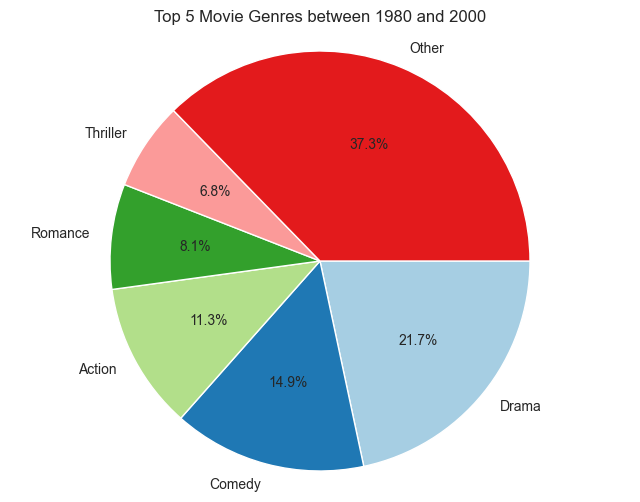

In [16]:
other_percentage = 100 - top_5_percentages.sum()

labels = [genre.title() for genre in top_5_genres.index.tolist()] + ['Other']
sizes = top_5_percentages.tolist() + [other_percentage]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=plt.cm.Paired.colors, counterclock=False)
plt.title('Top 5 Movie Genres between 1980 and 2000')
plt.axis('equal')
plt.show()

### Top actor-director pairs

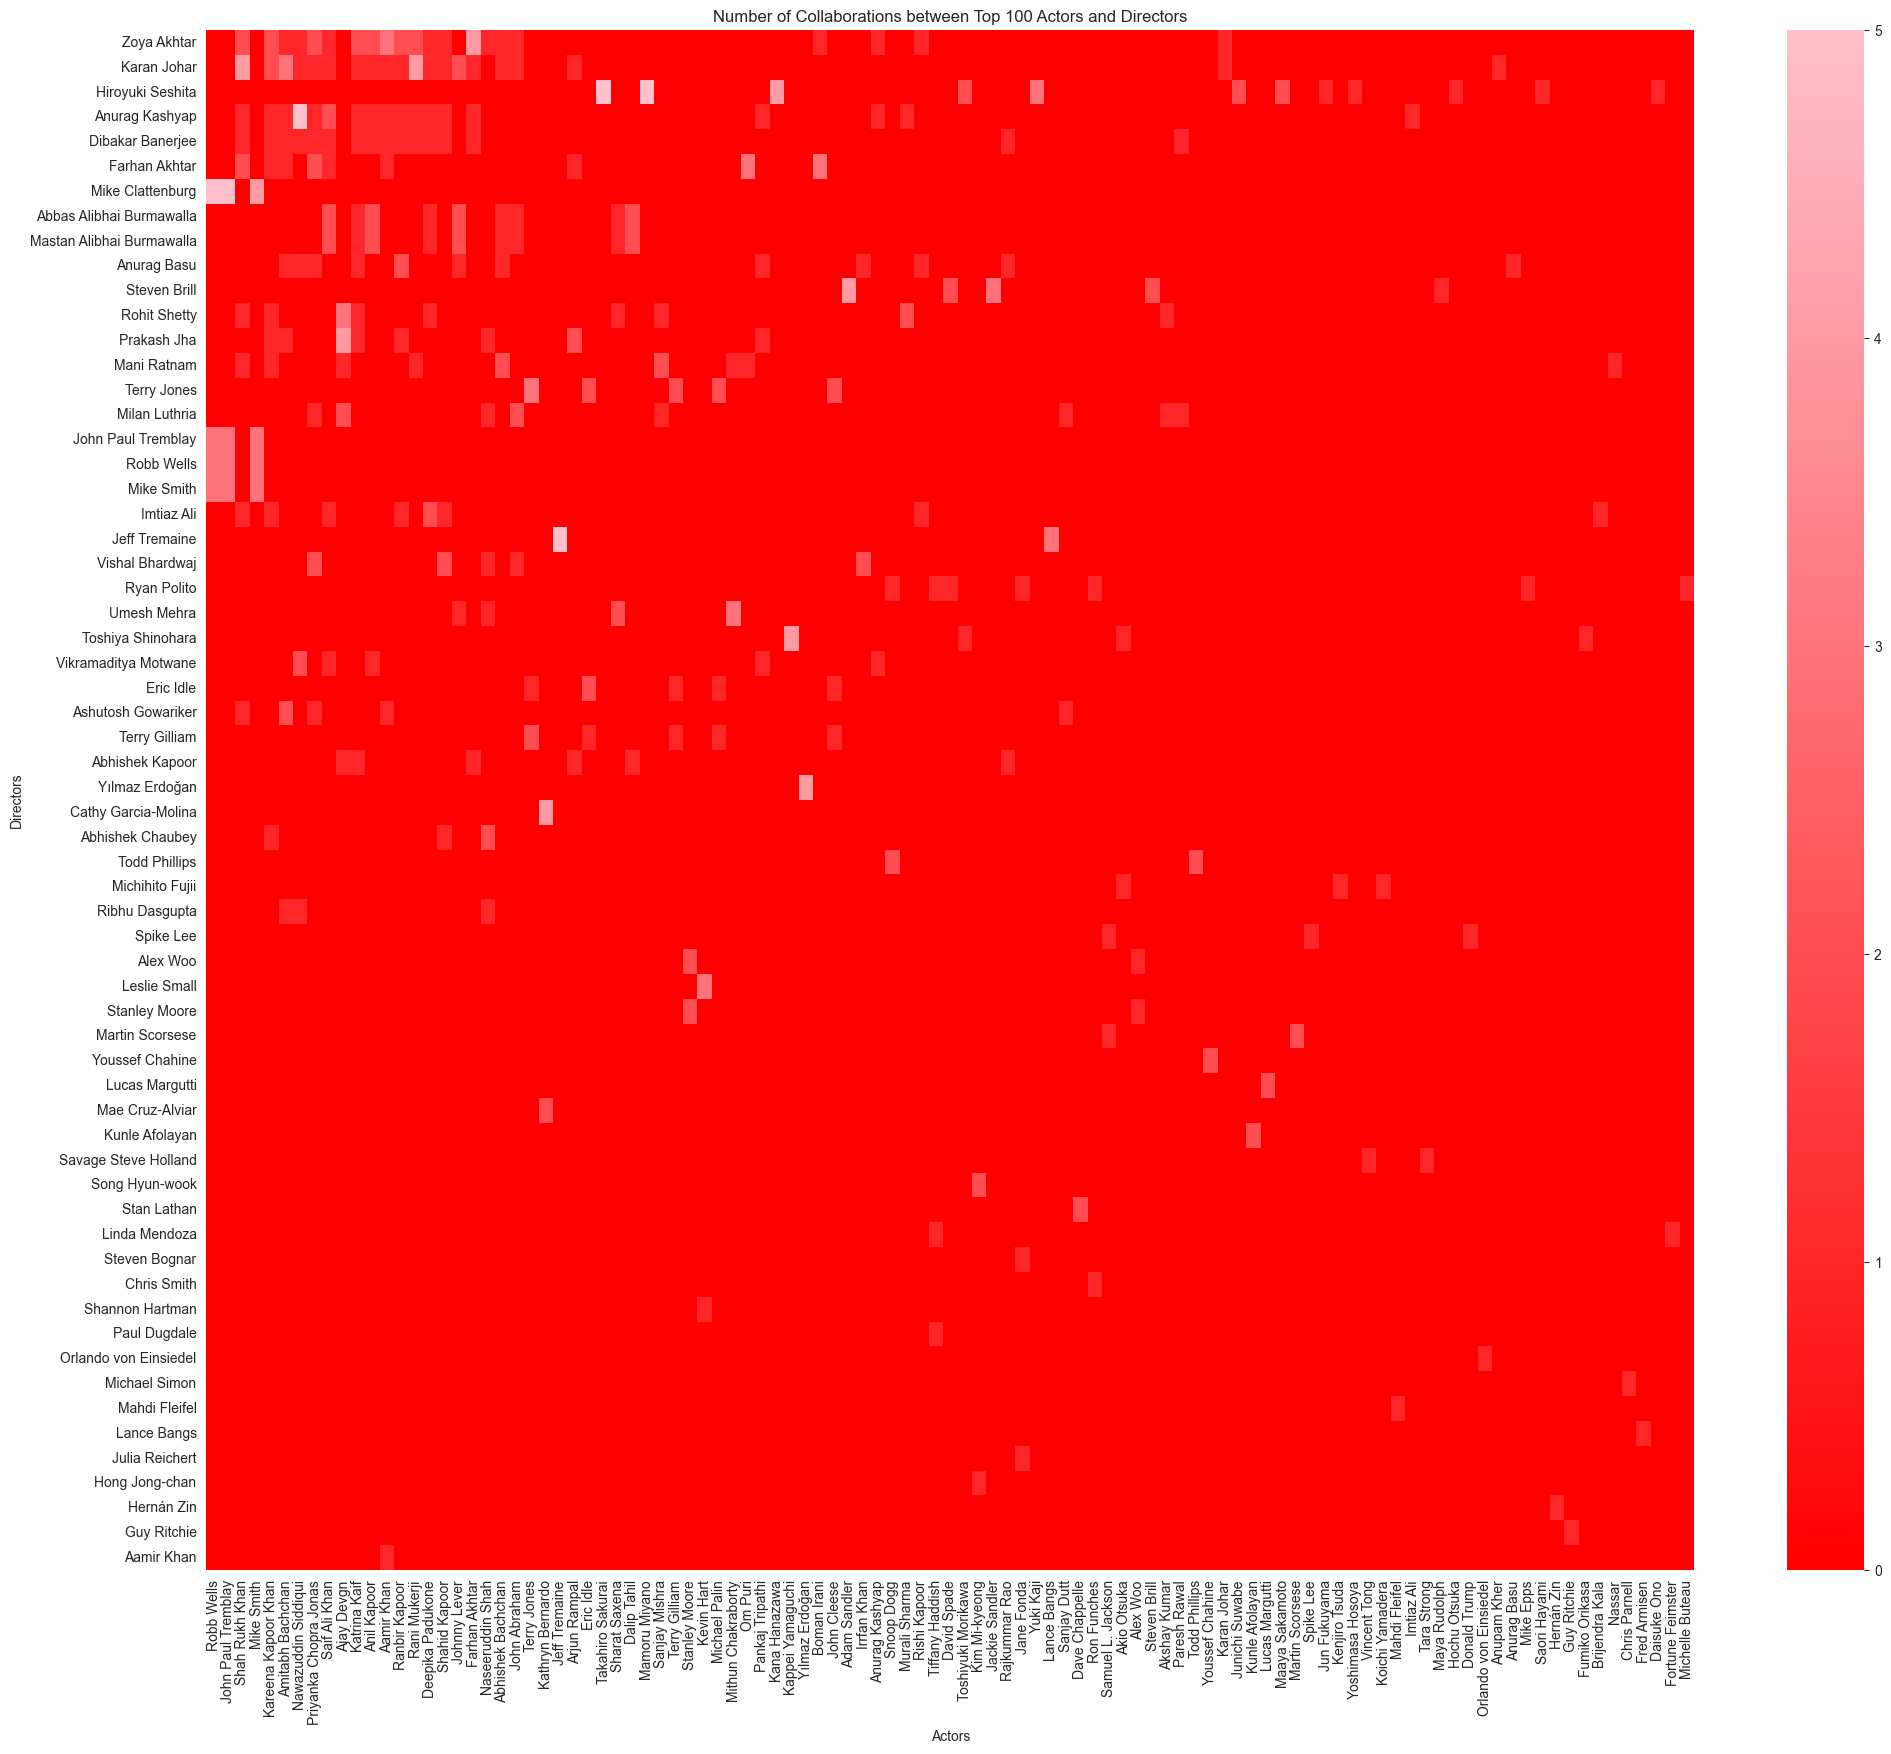

In [17]:
# Get the top 100 directors and actors
top_directors = crew[crew['role'] == 'DIRECTOR']['name'].value_counts().head(100).index
top_actors = crew[crew['role'] == 'ACTOR']['name'].value_counts().head(100).index
filtered_crew = crew[crew['name'].isin(top_directors) | crew['name'].isin(top_actors)]

# Create a matrix of directors vs actors measuring how much they worked together
collaborations = pd.merge(filtered_crew[filtered_crew['role'] == 'ACTOR'],
                          filtered_crew[filtered_crew['role'] == 'DIRECTOR'],
                          on='id')
collaboration_matrix = collaborations.pivot_table(index='name_y', columns='name_x', aggfunc='size', fill_value=0)
actors_sorted = collaboration_matrix.sum(axis=0).sort_values(ascending=False).index
directors_sorted = collaboration_matrix.sum(axis=1).sort_values(ascending=False).index
sorted_matrix = collaboration_matrix.loc[directors_sorted, actors_sorted]

cmap = LinearSegmentedColormap.from_list('custom_pink_red', ['red', 'pink'], N=256)

# Generate the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(sorted_matrix, annot=False, cmap=cmap)
plt.title('Number of Collaborations between Top 100 Actors and Directors')
plt.xlabel('Actors')
plt.ylabel('Directors')
plt.show()

### Average IMDB Scores for each director 

C:\Users\aymen\AppData\Local\Temp\ipykernel_33152\1915858148.py:15: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  plt.tight_layout()
C:\Users\aymen\AppData\Local\Temp\ipykernel_33152\1915858148.py:15: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  plt.tight_layout()
C:\Users\aymen\AppData\Local\Temp\ipykernel_33152\1915858148.py:15: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  plt.tight_layout()


                     name  imdb_score
1255          Jason Hehir         9.1
2817    Sashi Kiran Tikka         9.1
441        Bruno Stagnaro         9.0
1135      Hiroshi Koujina         9.0
96    Alastair Fothergill         8.9
...                   ...         ...
735           Dawn Porter         8.1
783        Domini Hofmann         8.1
889        Fabrice Nzinzi         8.1
1085         Han Hyun-hee         8.1
1151          Ian Bonhôte         8.1

[100 rows x 2 columns]


C:\Users\aymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\aymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\aymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


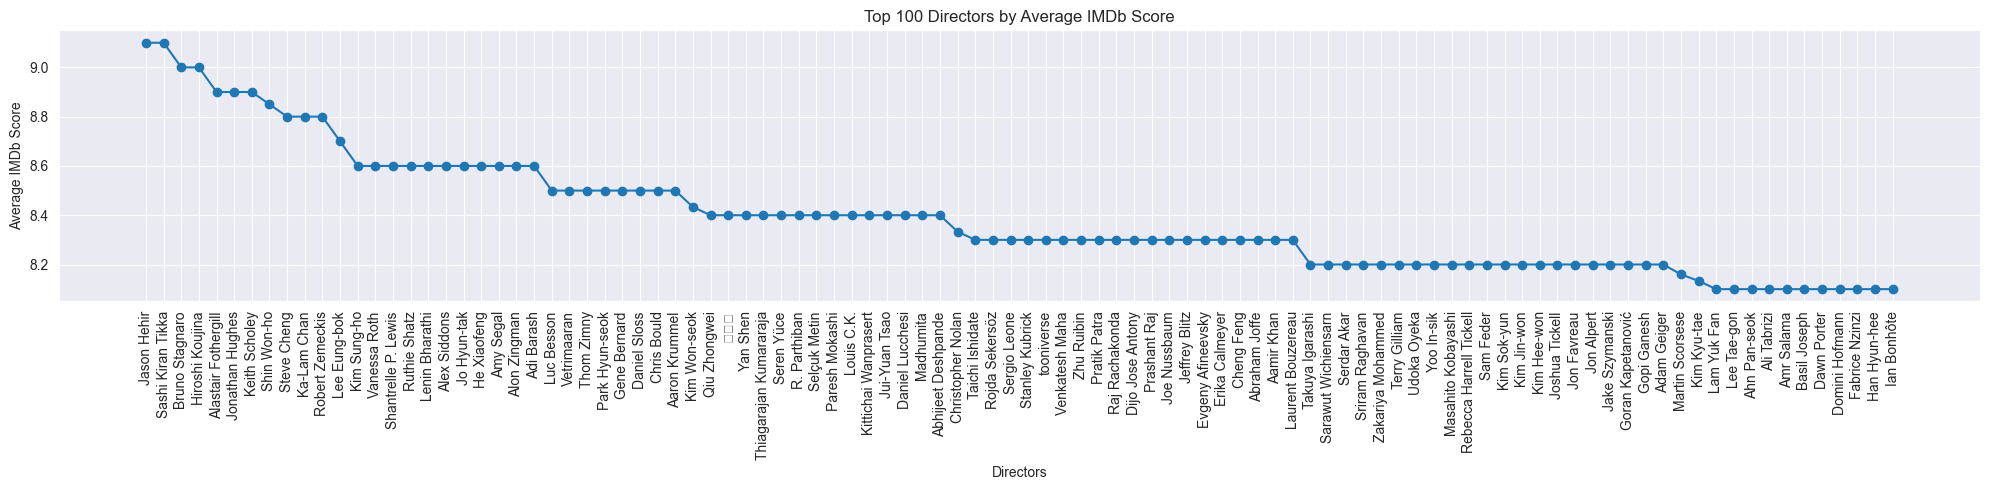

In [18]:
# Get the 100 highest average imdb score directors 
crew_with_scores = pd.merge(crew, titles, on='id')
directors_with_scores = crew_with_scores[crew_with_scores['role'] == 'DIRECTOR']
director_avg_scores = directors_with_scores.groupby('name')['imdb_score'].mean().reset_index()
top_directors_by_score = director_avg_scores.nlargest(100, 'imdb_score')
top_directors_by_score = top_directors_by_score.sort_values('imdb_score', ascending=False)

# Generate the line chart
plt.figure(figsize=(20, 5))
plt.plot(top_directors_by_score['name'].astype(str), top_directors_by_score['imdb_score'], marker='o')
plt.title('Top 100 Directors by Average IMDb Score')
plt.xlabel('Directors')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=90)
plt.tight_layout()
print(top_directors_by_score)
plt.show()

### Top 20 most popular characters

character
Alex        46
David       44
Max         41
Peter       39
Sam         37
Anna        36
Sarah       33
Ana         33
Charlie     33
Paul        32
Laura       32
Frank       31
George      31
Tony        31
Mary        31
John        30
Ben         30
Infected    30
Michael     30
Omar        29
Name: count, dtype: int64


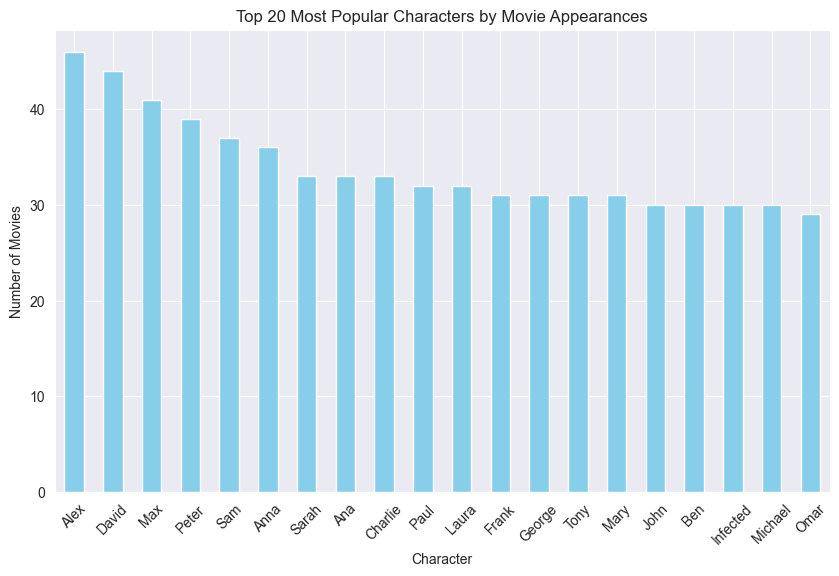

In [19]:
actors = crew[crew['role'] == 'ACTOR']
# Excluse these generic characters from the dataframe
exclusions = ["Self", "Himself", "Herself", "Self (archive footage)", '(voice)', 'Additional Voices (voice)', 
              'Dancer', 'Nurse', 'Doctor', 'Self - Host', 'Reporter', 'Himself (archive footage)', 'Party Guest',
              'Narrator', 'Narrator (voice)', 'Police Officer', 'Bartender', 'Teacher', 'Additional Voice (voice)', 
              'Judge', 'Priest', 'Choir', 'Student', 'Waitress', 'Self (archive footage) (uncredited)']
actors = actors[~actors['character'].isin(exclusions)]

character_counts = actors['character'].value_counts()

top_characters = character_counts.head(20)

plt.figure(figsize=(10, 6))
top_characters.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Popular Characters by Movie Appearances')
plt.xlabel('Character')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
print(top_characters)
plt.show()

### The show/movie ratio for the 100 most popular actors

type                 MOVIE  SHOW  total
name                                   
Boman Irani           25.0   0.0   25.0
Kareena Kapoor Khan   25.0   0.0   25.0
Shah Rukh Khan        23.0   0.0   23.0
Takahiro Sakurai       7.0  14.0   21.0
Amitabh Bachchan      20.0   0.0   20.0
...                    ...   ...    ...
Dalip Tahil           11.0   0.0   11.0
Danny Trejo            9.0   2.0   11.0
Dee Bradley Baker      6.0   5.0   11.0
Erin Mathews           7.0   4.0   11.0
Frank Grillo          10.0   1.0   11.0

[100 rows x 3 columns]


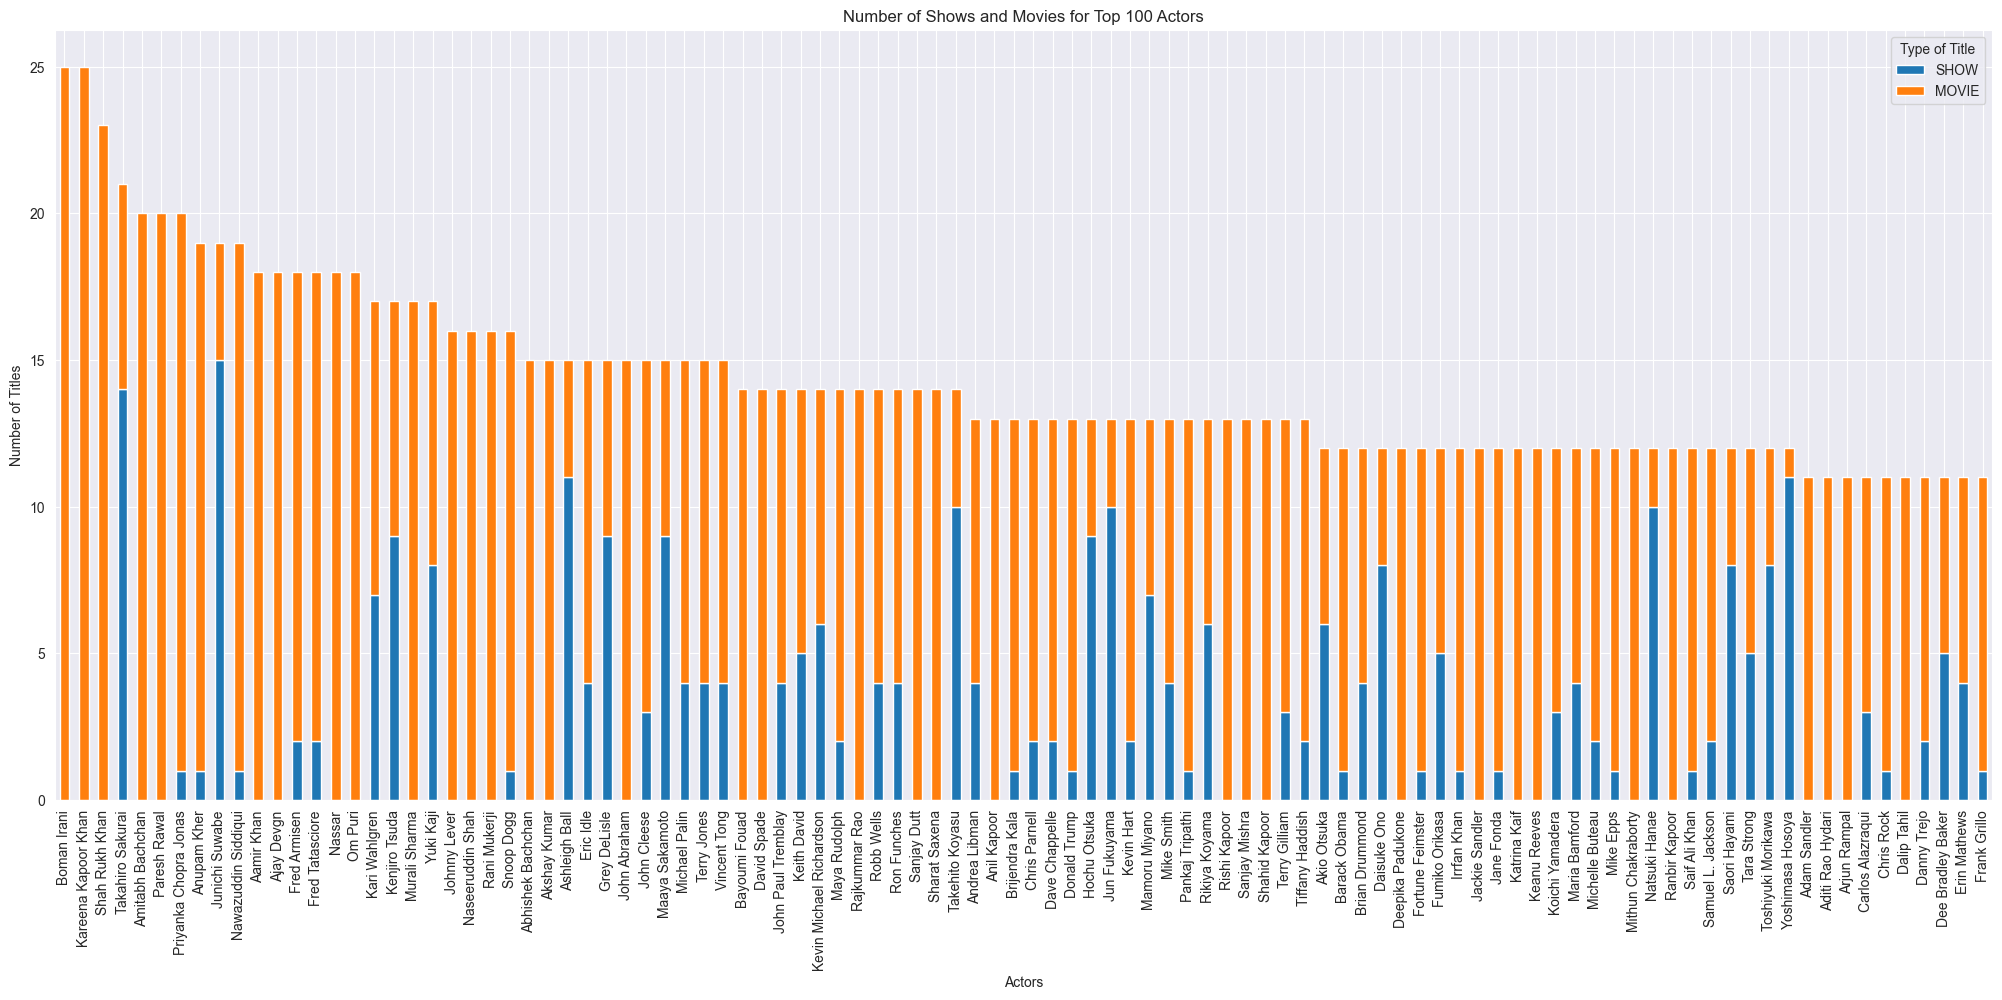

In [20]:
# Get the 100 most popular actors
actors = crew[crew['role'] == 'ACTOR']
actor_titles = pd.merge(actors, titles, on='id')
actor_title_counts = actor_titles.groupby(['name', 'type']).size().unstack().fillna(0)
actor_title_counts['total'] = actor_title_counts.sum(axis=1)
top_actors = actor_title_counts.nlargest(100, 'total')

# Create the stacked bar graph
top_actors[['SHOW', 'MOVIE']].plot(kind='bar', stacked=True, figsize=(25, 10))
plt.title('Number of Shows and Movies for Top 100 Actors')
plt.xlabel('Actors')
plt.ylabel('Number of Titles')
plt.legend(title='Type of Title')
print(top_actors)
plt.show()

### Word cloud of the descriptions of shows/movies of the most popular actor

Most Popular Actor: Boman Irani


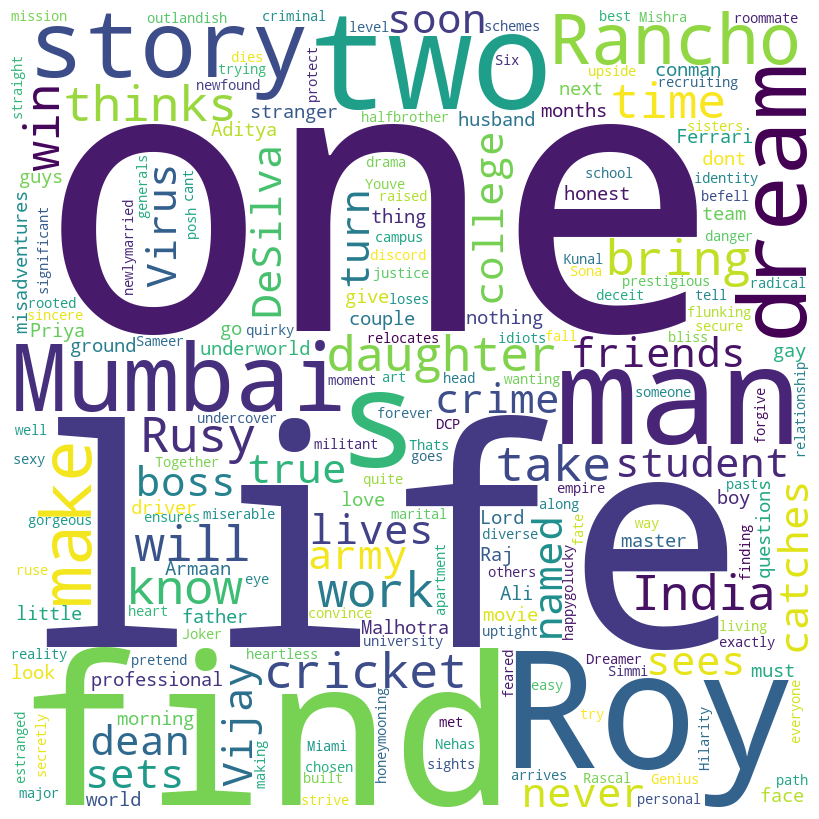

In [21]:
# Get the most popular actor
actors = crew[crew['role'] == 'ACTOR']
actor_descriptions = pd.merge(actors, titles, on='id')
actor_counts = actor_descriptions['name'].value_counts()
most_popular_actor_id = actor_counts.idxmax()

# Merge all the descriptions from the shows/movies of the most popular actor
descriptions = actor_descriptions[actor_descriptions['name'] == most_popular_actor_id]['description']
all_descriptions = " ".join(descriptions)
all_descriptions = all_descriptions.translate(str.maketrans('', '', string.punctuation))

# Create the word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                     min_font_size = 10).generate(all_descriptions)
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

print('Most Popular Actor:', most_popular_actor_id)
plt.show()

### 3D surface graph of the movies' runtime VS year of release VS tmdb popularity

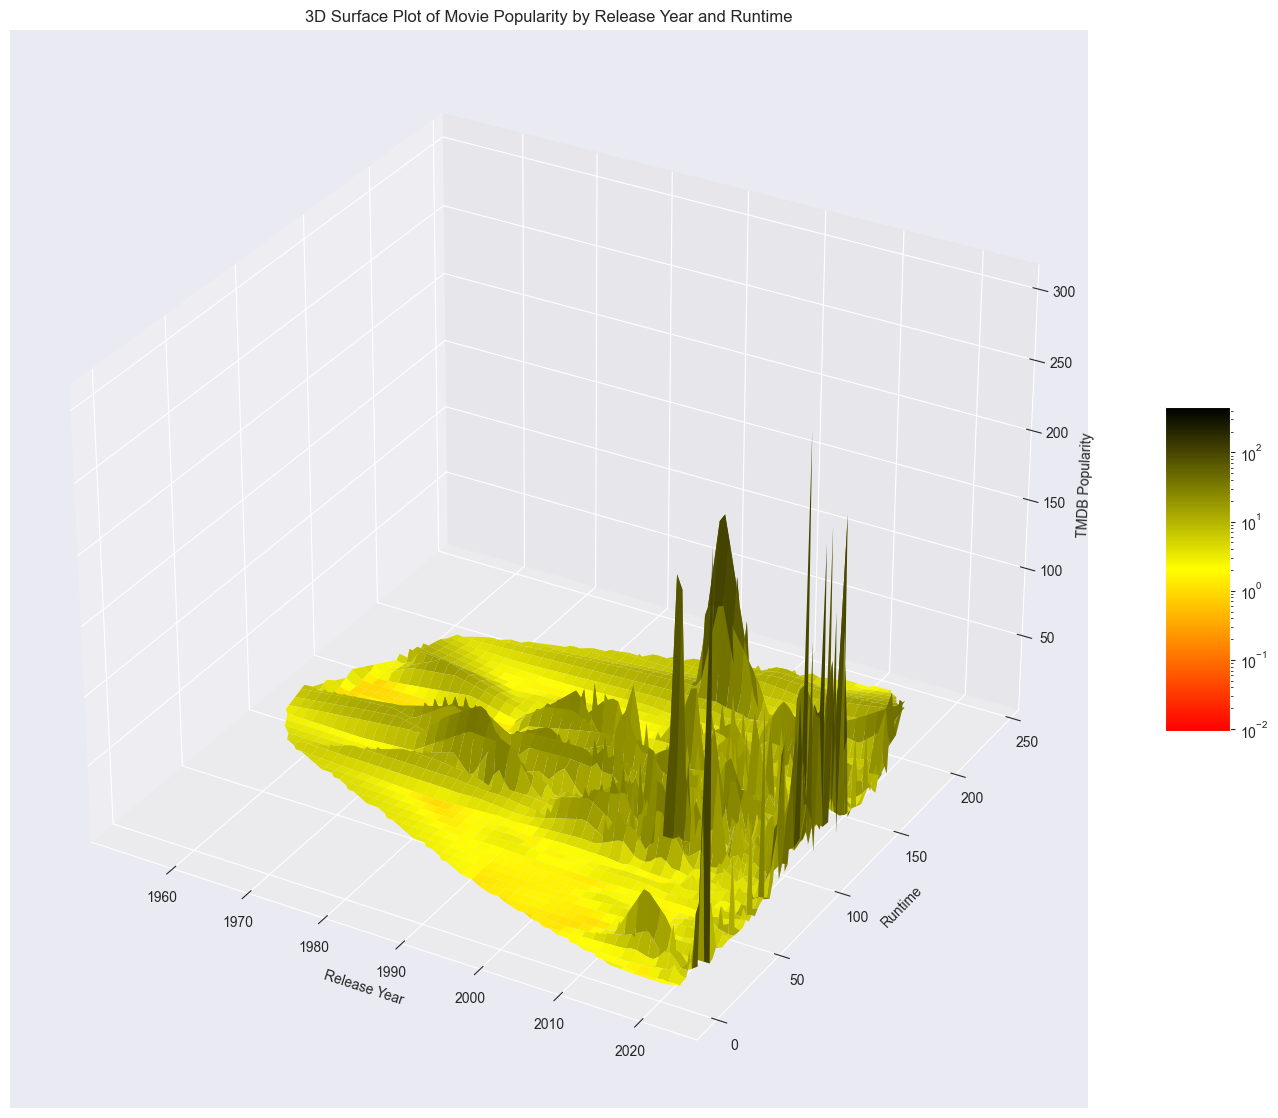

In [22]:
movies = titles[titles['type'] == 'MOVIE']
movies = movies.dropna(subset=['release_year', 'runtime', 'tmdb_popularity'])

# Create the axes
x = np.linspace(movies['release_year'].min(), movies['release_year'].max(), num=100)
y = np.linspace(movies['runtime'].min(), movies['runtime'].max(), num=100)
x_grid, y_grid = np.meshgrid(x, y)
z_grid = griddata((movies['release_year'], movies['runtime']), movies['tmdb_popularity'], (x_grid, y_grid), method='linear')

# Set the color progression
cmap = LinearSegmentedColormap.from_list('custom', ['red', 'yellow', 'black'], N=256)
norm = LogNorm(vmin=movies['tmdb_popularity'].min(), vmax=movies['tmdb_popularity'].max())

# Create the 3D surface graph
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap=cmap, norm=norm, edgecolor='none')
ax.set_xlabel('Release Year')
ax.set_ylabel('Runtime')
ax.set_zlabel('TMDB Popularity')
ax.set_title('3D Surface Plot of Movie Popularity by Release Year and Runtime')
fig.colorbar(surf, ax=ax, shrink=0.3, aspect=5)
plt.show()